In [ ]:
#NE PAS MODIFIER CETTE CELL
import pandas as pd

from google.colab import drive

drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#NE PAS MODIFIER CETTE CELL
df = pd.read_csv('/content/drive/MyDrive/DATA/events.csv')
print(df.head())

       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


In [ ]:
#NE PAS MODIFIER CETTE CELL
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
df['date'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,dayofweek,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015,6,2,1,5
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015,6,2,1,5
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015,6,2,1,5
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015,6,2,1,5
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015,6,2,1,5


In [ ]:
## SOOYOUNG 09/01 ##
# Nombre de visites
stats = df.groupby('visitorid').agg({'visitorid':'count'})
stats = stats.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par visitorid
view = df.loc[df['event'] == 'view'].groupby('visitorid').agg({'visitorid':'count'})
view = view.rename(columns={"visitorid": "nb_views"})

# Nombre de addtocarts par visitorid
addtocart = df.loc[df['event'] == 'addtocart'].groupby('visitorid').agg({'visitorid':'count'})
addtocart = addtocart.rename(columns={"visitorid": "nb_addtocarts"})

# Nombre de transactions par visitorid
transaction = df.loc[df['event'] == 'transaction'].groupby('visitorid').agg({'visitorid':'count'})
transaction = transaction.rename(columns={"visitorid": "nb_transactions"})

# Merge les dataframes
stats = pd.merge(stats, view, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, addtocart, left_index=True, right_index=True, how='left')
stats = pd.merge(stats, transaction, left_index=True, right_index=True, how='left')

# Nombre de visite par mois par visitorid
for i in df['month'].value_counts().index:
    month = df.loc[df['month'] == i].groupby('visitorid').agg({'visitorid':'count'})
    month = month.rename(columns={"visitorid": "nb_month_"+str(i)})
    stats = pd.merge(stats, month, left_index=True, right_index=True, how='left')
    
stats.sort_values('nb_transactions', ascending=False)


,nb_visites,nb_views,nb_addtocarts,nb_transactions,nb_month_7,nb_month_6,nb_month_5,nb_month_8,nb_month_9
visitorid,,,,,,,,,
1150086,7757,6479.0,719.0,559.0,3093.0,1855.0,NaN,1735.0,1074.0
152963,3024,2304.0,371.0,349.0,32.0,NaN,NaN,1832.0,1160.0
530559,4328,3623.0,419.0,286.0,1998.0,540.0,NaN,1345.0,445.0
684514,2246,1826.0,231.0,189.0,643.0,1602.0,1.0,NaN,NaN
861299,1991,1573.0,230.0,188.0,1028.0,NaN,NaN,963.0,NaN
...,...,...,...,...,...,...,...,...,...
1407575,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1407576,1,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1407577,1,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN


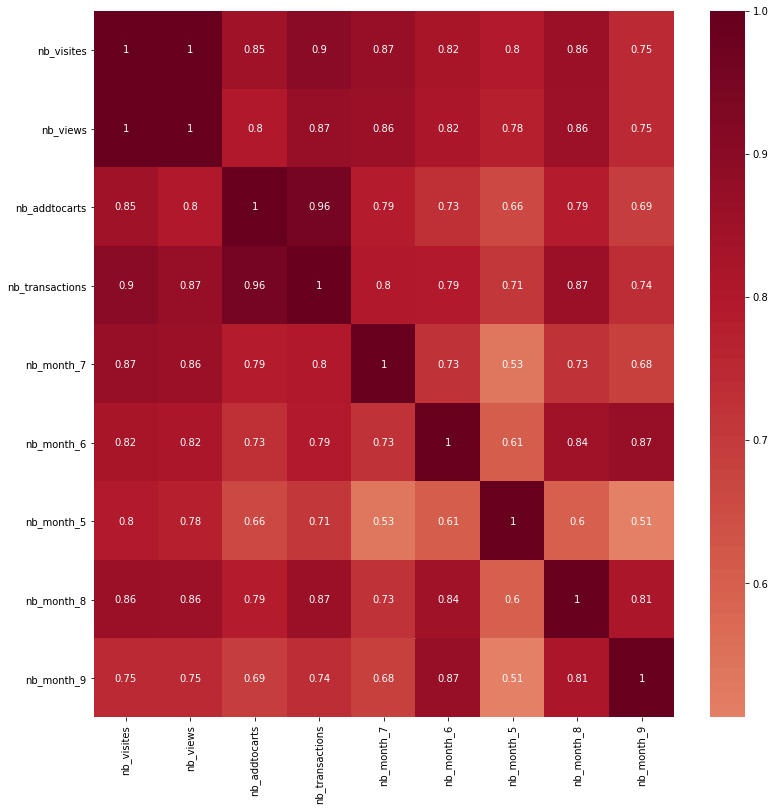

In [ ]:
## SOOYOUNG 06/02 ##
# Relations entre les variables
plt.figure(figsize=(13,13))
sns.heatmap(stats.corr(), annot=True, cmap='RdBu_r', center=0)

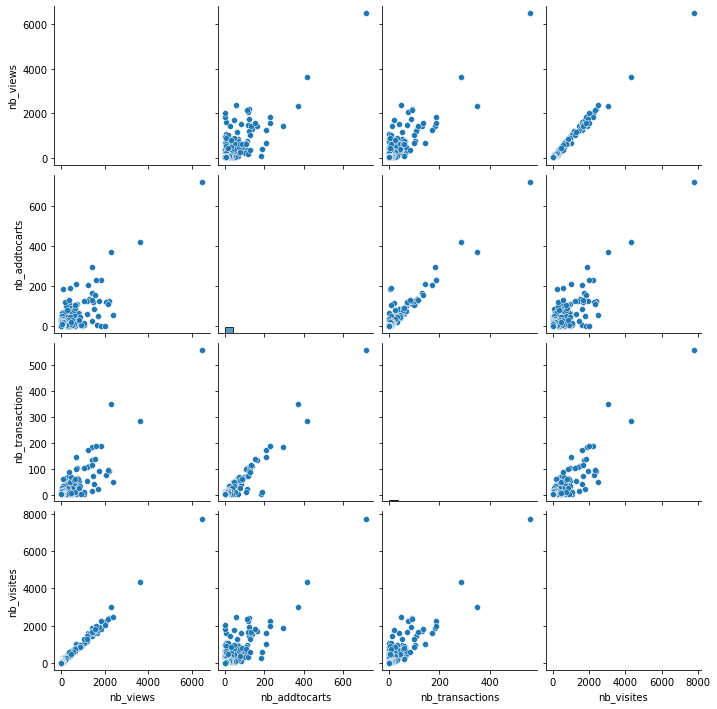

In [7]:
## SOOYOUNG 06/02 ##
# Relations entre les variables
# L'exécution prend environs 10minutes
sns.pairplot(stats[['nb_views', 'nb_addtocarts', 'nb_transactions', 'nb_visites']])


In [ ]:
## MELISSA 09/01 ##
# Relation entre la variable continue transactionid et la variable catégorielle event
# Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA) à un facteur
import statsmodels.api
result = statsmodels.formula.api.ols('transactionid ~ event', data = df).fit()
table_eventXtransactionid = statsmodels.api.stats.anova_lm(result)
table_eventXtransactionid

#df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
# Celle-ci est supérieure à 50%. On ne peut donc pas conclure à une relation d'influence entre la var. event et la var. transactionid 

,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,3.484181e+07,1.742090e+07,0.669795,0.511824
Residual,22455.0,5.840387e+11,2.600929e+07,NaN,NaN


In [ ]:
# Relation entre la variable continue itemid et la variable catégorielle event
# Pour étudier ce type de corrélation on a recours à l’analyse de la variance (ANOVA) à un facteur
import statsmodels.api
result = statsmodels.formula.api.ols('itemid ~ event', data = df).fit()
table_eventXitemid = statsmodels.api.stats.anova_lm(result)
table_eventXitemid

#df renesigne le degré de liberté de la statistique de test Fqui suit une loi de Fisher; PR(>F) renseigne la valeur de la p-valeur du test.
# Cette fois-ci, la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle event n'influe pas sur itemid.

,df,sum_sq,mean_sq,F,PR(>F)
event,2.0,4.217666e+11,2.108833e+11,11.710356,0.000008
Residual,2756098.0,4.963256e+16,1.800827e+10,NaN,NaN


In [ ]:
 #Si on regarde maintenant les relations par type d'event : nb_vistites, nb_view et ne_addtocart (variable continue) par la variable transation
#ata = df.drop(['nb_visites', 'nb_views', 'nb_addtocarts', 'nb_transactions'], axis=0)

import seaborn as sns

f, ax = df.subplots(figsize=(10, 8))
corr = dataframe.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

AttributeError: ignored

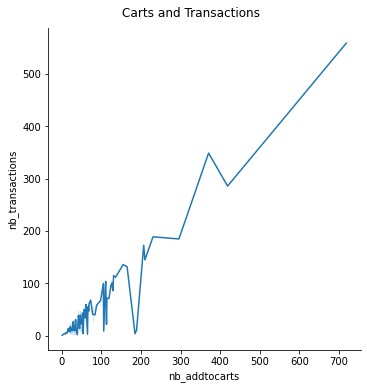

In [ ]:
## SOOYOUNG 09/01 ##
# Relation entre nombre de addtocarts et nombre de transactions
g = sns.relplot(x="nb_addtocarts", 
                y="nb_transactions",
                data=stats,
                kind="line",
                markers=True,
                dashes=False)
g.fig.suptitle("Carts and Transactions",y=1.03)
plt.show()

In [ ]:
## SOOYOUNG 06/02 ##
# Calculate Pearson's correlation
from scipy.stats import pearsonr
stats = stats.fillna(0)
pd.DataFrame(pearsonr(stats['nb_addtocarts'], stats['nb_transactions']), index=['pearson_coeff', 'p-value'], columns=['Relation entre nb_addtocarts et nb_transactions'])

,Relation entre nb_addtocarts et nb_transactions
pearson_coeff,0.903854
p-value,0.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


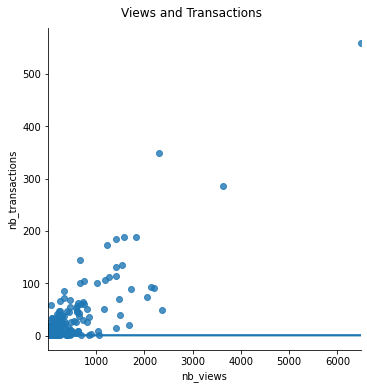

In [ ]:
## SOOYOUNG 09/01 ##
# Relation entre nombre de views et nombres de transactions
g = sns.lmplot(x='nb_views', y='nb_transactions', lowess=True, data=stats)
g.fig.suptitle("Views and Transactions",y=1.03)
plt.show()

In [ ]:
## SOOYOUNG 09/01 ##
pd.set_option('float_format', '{:f}'.format)
stats.describe()

,nb_visites,nb_views,nb_addtocarts,nb_transactions,nb_month_7,nb_month_6,nb_month_5,nb_month_8,nb_month_9
count,1407580.000000,1404179.000000,37722.000000,11719.000000,377199.000000,313832.000000,307574.000000,311128.000000,173728.000000
mean,1.958042,1.897416,1.837973,1.916290,1.850440,1.944967,1.920357,1.778567,1.748193
std,12.580492,11.006607,6.882063,8.850529,9.603107,8.503020,8.234851,7.979438,7.214078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,7757.000000,6479.000000,719.000000,559.000000,3093.000000,1855.000000,1987.000000,1832.000000,1200.000000


In [ ]:
## SOOYOUNG 09/01 ##
# VISUALISATION DU DATA
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette(['#39A7D0','#36ADA4'])

# Visiteurs par date
plt.figure(figsize = (14,14))

# Visiteurs par mois
plt.subplot(221)
sns.countplot(x='month', data=df)
plt.title('Nombre de visiteurs par mois')
plt.grid()

# Visiteurs par jour
plt.subplot(222)
sns.countplot(x='day', data=df)
plt.title('Nombre de visiteurs par jour')
plt.grid()

# Visiteurs par jour de semaine
plt.subplot(223)
sns.countplot(x='dayofweek', data=df)
plt.title('Nombre de visiteurs par jour de semaine')
plt.grid()

# Visiteurs par heure
plt.subplot(224)
sns.countplot(x='hour', data=df)
plt.title('Nombre de visiteurs par heure')
plt.grid()

NameError: ignored

In [ ]:
## SOOYOUNG 09/01 ##
# Nombre de visites par itemsid
items = df.groupby('itemid').agg({'visitorid':'count'})
items = items.rename(columns={"visitorid": "nb_visites"})

# Nombre de views par itemid
items_view = df.loc[df['event'] == 'view'].groupby('itemid').agg({'itemid':'count'}) #df.loc[df['itemid'] == 9]
items_view = items_view.rename(columns={"itemid": "nb_views"})

# Nombre de addtocarts par itemid
items_addtocart = df.loc[df['event'] == 'addtocart'].groupby('itemid').agg({'itemid':'count'})
items_addtocart = items_addtocart.rename(columns={"itemid": "nb_addtocarts"})

# Nombre de transactions par itemid
items_transaction = df.loc[df['event'] == 'transaction'].groupby('itemid').agg({'itemid':'count'})
items_transaction = items_transaction.rename(columns={"itemid": "nb_transactions"})

# Merge dataframes
items = pd.merge(items, items_view, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_addtocart, left_index=True, right_index=True, how='left')
items = pd.merge(items, items_transaction, left_index=True, right_index=True, how='left')
items

# idées : 
# Matrix par items : produit star
# Matrix par visitor : buyer star
# Visitorid sur la matrix de items
# Visitorid par timestamp : est ce qu'il est venu tous les jours, tous les 2 jours ? fréquences combien de temps il a mit pour acheter un produit ?


,nb_visites,nb_views,nb_addtocarts,nb_transactions
itemid,,,,
3,2,2.0,NaN,NaN
4,3,3.0,NaN,NaN
6,29,29.0,NaN,NaN
9,2,2.0,NaN,NaN
15,22,18.0,3.0,1.0
...,...,...,...,...
466861,95,89.0,5.0,1.0
466862,4,4.0,NaN,NaN
466863,1,1.0,NaN,NaN


In [ ]:
## SOOYOUNG 30/01 ##
n_produits = 40

# les 20 produits plus achetés
top_produits_vendus = items.sort_values(by='nb_transactions', ascending=False).head(n_produits)
top_produits_vendus['cat_produits_plus_vendus'] = "1"
top_produits_vendus = top_produits_vendus.drop(columns=['nb_visites', 'nb_views', 'nb_addtocarts'])

# les 20 produits plus mis au panier
top_produits_paniers = items.sort_values(by='nb_addtocarts', ascending=False).head(n_produits)
top_produits_paniers['cat_produits_plus_mis_panier'] = "1"
top_produits_paniers = top_produits_paniers.drop(columns=['nb_visites', 'nb_views', 'nb_transactions'])

# les 20 produits plus vus
top_produits_vus = items.sort_values(by='nb_views', ascending=False).head(n_produits)
top_produits_vus['cat_produits_plus_vus'] = "1"
top_produits_vus = top_produits_vus.drop(columns=['nb_visites', 'nb_addtocarts', 'nb_transactions'])

# Merge les 3 dataframes OUTER
top_produits = pd.merge(top_produits_vendus, top_produits_paniers, left_index=True, right_index=True, how='outer')
top_produits = pd.merge(top_produits, top_produits_vus, left_index=True, right_index=True, how='outer')

top_produits = top_produits[['nb_views', 'nb_addtocarts', 'nb_transactions', 'cat_produits_plus_vus', 'cat_produits_plus_mis_panier', 'cat_produits_plus_vendus']]
top_produits

NameError: ignored

In [ ]:
## SOOYOUNG 30/01 ##
# Créer catégorie cat_produits_recommandations
# Si un produit est dans les 3 catégories plus vus, plus mis, plus vendus, 
# le produit sera classé 3 étoiles dans cat_produits_recommandations
top_produits = top_produits.fillna(0)
top_produits['stars_produits_recommandations'] = top_produits['cat_produits_plus_vus'].astype(int) + top_produits['cat_produits_plus_mis_panier'].astype(int) + top_produits['cat_produits_plus_vendus'].astype(int)

top_produits = top_produits.sort_values(by='stars_produits_recommandations', ascending=False)
top_produits

In [ ]:
PARTIE MELISSA 

In [ ]:
#Postulat : je cherche à crée un modèle prédictif pouvant prédire si un type d'achat ...
#...peut conduire à un autre type d'achat, en fonction du comportement des autres acheteur

In [ ]:
# Exploration du jeu de données
df.info()
## Obs : nous avons que des variables numériques, à l'exception de la variable event qui est une variable catégorielle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   date           datetime64[ns]
 6   year           int64         
 7   month          int64         
 8   day            int64         
 9   dayofweek      int64         
 10  hour           int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 231.3+ MB


In [ ]:
# Count null features in the dataset
df.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
date                   0
year                   0
month                  0
day                    0
dayofweek              0
hour                   0
dtype: int64

In [ ]:
#Il faut remplacer les features nulles with zero valures afin d'avoir un dataset clean pour faire le modèle de prédiction
#replace the null features with 0:
df.fillna(0, inplace=True) 
# Re-check N/A was replaced with 0.
df.isnull().sum()
#ok

timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
date             0
year             0
month            0
day              0
dayofweek        0
hour             0
dtype: int64

In [ ]:
#Dans cette BDD, nous avons toutes les transactions effectuées par les visitor id ...
# qui inclut chaque transaction effectuée par chacun d'entre eux. 


In [ ]:
#Group by User ID
purchases = df.groupby(['visitorid']).sum().reset_index()


,visitorid,timestamp,itemid,transactionid,year,month,day,dayofweek,hour
0,0,4326014266205,710539,0.0,6045,27,33,12,60
1,1,1439487966444,72028,0.0,2015,8,13,3,17
2,2,11511766071000,2353771,0.0,16120,64,56,32,141
3,3,1438413035296,385090,0.0,2015,8,1,5,7
4,4,1442352267167,177677,0.0,2015,9,15,1,21


In [ ]:
#test with one visitor ID
df[df['visitorid'] == 122000]
#J'obtiens le comportement du consommateur 122000. J'observe que ce client ne fait que regarder certains article, ce n'est pas un acheteur.


,timestamp,visitorid,event,itemid,transactionid,date,year,month,day,dayofweek,hour
483095,1435163445461,122000,view,80146,0.0,2015-06-24 16:30:45.461,2015,6,24,2,16
1311056,1441816735149,122000,view,202788,0.0,2015-09-09 16:38:55.149,2015,9,9,2,16


In [ ]:
#Je cherche à segmenter par type de comportement sur le site 
#test qui ne marche pas
# df[df['visitorid'] == 2].loc[:['event','itemid','transactionid']]

In [ ]:
#La prédiction peut se faire aussi par les produits les plus achetés, ceux qui ont donc le plus de chances d'être achetés.
# item id represente le numero de l'item

df['itemid'].value_counts().head()
#Ci-dessous, les articles qui apparaissent le plus souvent dans les commandes. 


187946    3412
461686    2978
5411      2334
370653    1854
219512    1800
Name: itemid, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


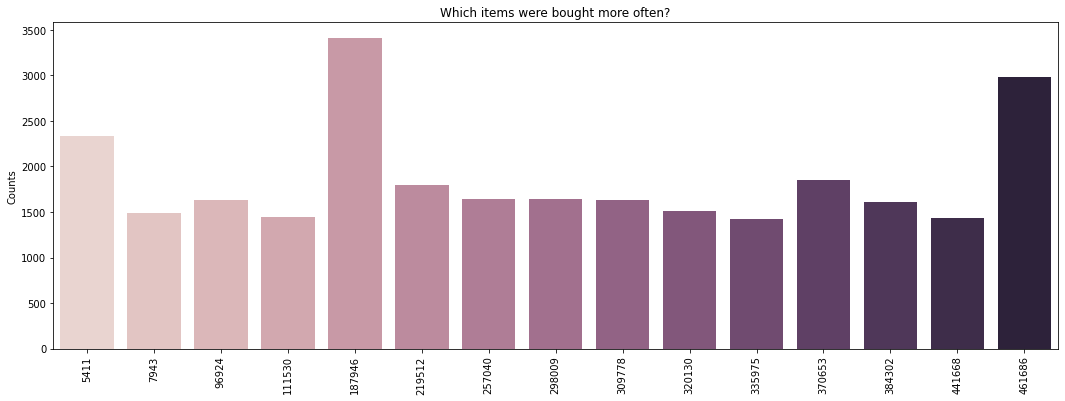

In [ ]:
#création d'un graphique avec les 15 articles les plus vendus
item_counts = df['itemid'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(item_counts.index, item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [ ]:
## Début partie Sadali

In [ ]:
# (Sadali) PARTIE Analyse des utilisateurs 
# dataframe avec que les transactions supérieur ou égal à 0 
transac = df[df['transactionid'] >= 0]




In [ ]:
# analysons le comportement des 10 visiteurs ayant effectué le plus de transactions
import seaborn as sns 
n = 10
transac['visitorid'].value_counts()[:n].index.tolist()
l = transac['visitorid'].value_counts()[:n].index.tolist()
newtran10 = transac['visitorid'].isin(l)
# Les 10 visiteurs ayant fait le plus de transactions en ont réalisé 2342 sur les 22457.
transac[newtran10].visitorid.value_counts()

1150086    559
152963     349
530559     286
684514     189
861299     188
76757      185
138131     173
890980     145
1297062    136
247235     132
Name: visitorid, dtype: int64

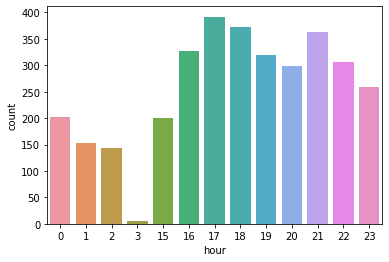

In [ ]:
# analysons le comportement des 20 visiteurs ayant effectué le plus de transactions 
n = 20
transac['visitorid'].value_counts()[:n].index.tolist()
l = [1150086,152963,530559,684514,861299,76757,138131,890980,1297062,247235,1161163,350566,645525,198270,757355,705542,371606,163561,836635,
 1385073]
newtran = transac['visitorid'].isin(l)
sns.countplot(x= 'hour',data=transac[newtran]);
# Les visiteurs ayant effectué le plus de transactions les ont réalisées entre minuit et 5h et 17h et 23h.


In [ ]:
# Classement des itemids en fontion du nombre de transactions
items_max = items_transaction.sort_values(by='nb_transactions', ascending= False)
items_max

,nb_transactions
itemid,
461686,133
119736,97
213834,92
312728,46
7943,46
...,...
190034,1
190095,1
190243,1


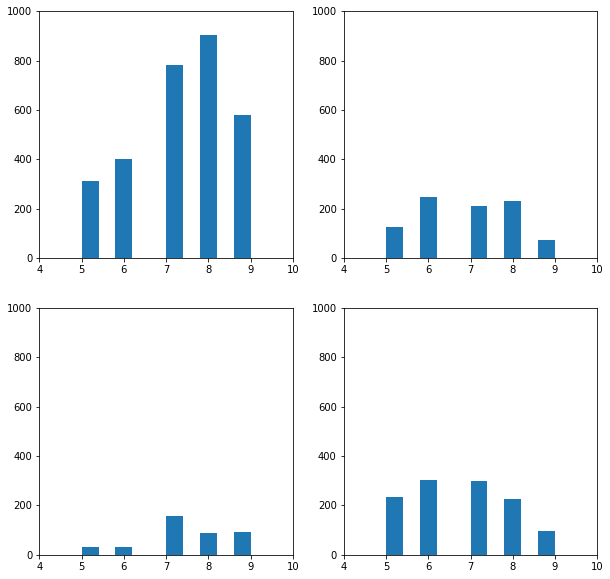

In [ ]:
# Etudier l'évolution des items les plus achetés par rapport au mois  
l = {461686,119736}
max_item_1 = df.loc[df['itemid']==461686] 
max_item_2 = df.loc[df['itemid']==119736]
max_item_3 = df.loc[df['itemid']==213834]
max_item_4 = df.loc[df['itemid']==312728]

fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.axis([4,10,0,1000])
plt.hist(max_item_1.month);

plt.subplot(222)
plt.axis([4,10,0,1000])
plt.hist(max_item_2.month);

plt.subplot(223)
plt.axis([4,10,0,1000])
plt.hist(max_item_3.month);

plt.subplot(224)
plt.axis([4,10,0,1000])
plt.hist(max_item_4.month);

#  Nous pouvons constater que l'item 461686, produit star, est plus populaire au mois de juillet et août
#  l'item 119736 est plus populaire au mois de juin et août
#  l'item 213834 est plus populaire au mois de juillet
#  l'item 312728 est plus populaire durant l'été 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


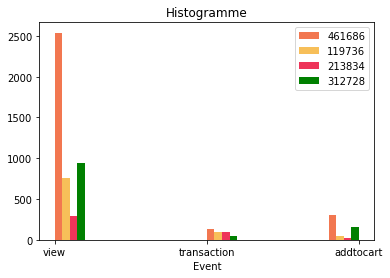

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.hist([max_item_1.event,max_item_2.event,max_item_3.event,max_item_4.event],color =['#f27750','#f7bf59','#EE3459','green'], label=['461686','119736','213834','312728'],rwidth=10);
plt.xlabel('Event')
plt.title('Histogramme')
plt.legend();
### Attention pbm plus de transactions que d'ajout au panier : doublons?
# Cet histogramme nous montre que le produit star 461686 necessite beaucoup de visites pour être ajouté dans le panier et acheté
# Au contraire, les vues du produit 213834 se transforme plus souvent en achat. # Il faudrait peut être augmenter la publicité sur ce produit et le mettre en avant sur le site.

In [ ]:
# Taux de conversion du produit 213834
max_item_3['event'].value_counts()

view           293
transaction     92
addtocart       17
Name: event, dtype: int64

In [ ]:
## Partie DataViz et Test

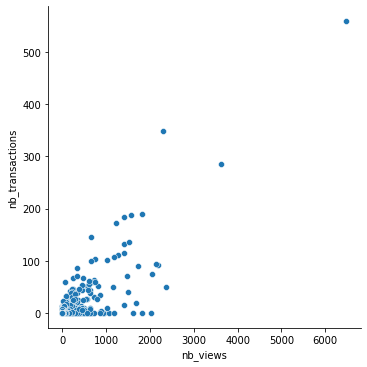

In [ ]:
stats
sns.relplot(x='nb_views',y='nb_transactions',data=stats);
# Commentaire
# Le lien entre les variables views et transactions est moins clair que celui de visites et views, mais il semble
# y'avoir une relation linéaire.

In [ ]:
# Remplaçons les Nans par 0 
stats = stats.fillna(0)
# Vérifions que les Nans ont bien été remplacé
stats.isnull().sum(axis = 0)

nb_visites         0
nb_views           0
nb_addtocarts      0
nb_transactions    0
nb_month_7         0
nb_month_6         0
nb_month_5         0
nb_month_8         0
nb_month_9         0
dtype: int64

In [ ]:
# Vérifions cela avec un test de Pearson 
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(stats['nb_views'], stats['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test'])
# p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes
# coefficient de pearson = 0.782903 : Les deux variables sont assez fortement corrélées.

,resultat_test
pearson_coef,0.782903
p-value,0.000000


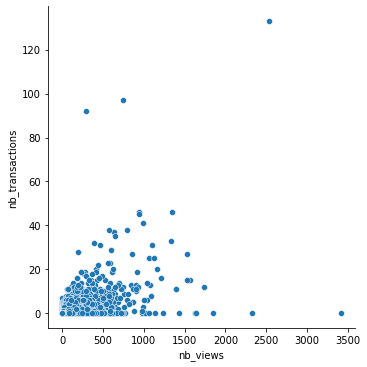

In [ ]:
items
sns.relplot(x='nb_views',y='nb_transactions',data=items);
# Il est difficile d'établir un lien concret mais nous pouvons penser qu'il existe une relation linéaire.

In [ ]:
# Remplaçons les Nans par 0 
items = items.fillna(0)
# Vérifions que les Nans ont bien été remplacé
items.isnull().sum(axis = 0)

nb_visites         0
nb_views           0
nb_addtocarts      0
nb_transactions    0
dtype: int64

In [ ]:
# Vérifions cela avec un test de Pearson 
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(items['nb_views'], items['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test'])
# p-value = 0<0.05 On rejette H0 : les deux variables ne sont donc pas indépendantes
# coefficient de pearson = 0.540263 : Les deux variables sont moyennement corrélées.

,resultat_test
pearson_coef,0.540263
p-value,0.000000


,resultat_test
pearson_coef,0.651187
p-value,0.000000


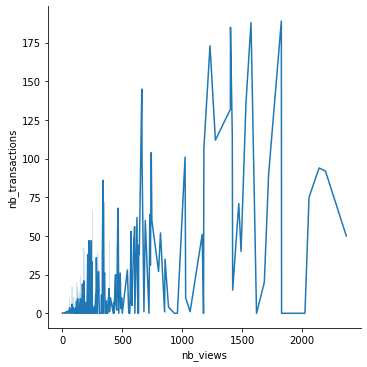

In [ ]:
# Refaisons les étapes précédentes en enlevants les valeurs extrêmes
stats_bis = stats.loc[(stats['nb_views']<3000) & (stats['nb_transactions']<200)]
sns.relplot(x='nb_views',y='nb_transactions',kind='line',data=stats_bis);
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(stats_bis['nb_views'], stats_bis['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test'])
# Le coefficient de pearson a baissé, la relation entre les variables est moins forte

,resultat_test
pearson_coef,0.5764
p-value,0.0000


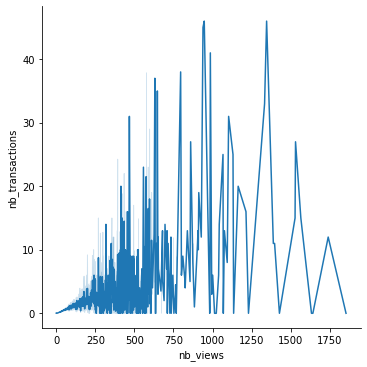

In [ ]:
items_bis = items.loc[(items['nb_views']<2000) & (items['nb_transactions']<60)]
sns.relplot(x='nb_views',y='nb_transactions',kind='line',data=items_bis);
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(items_bis['nb_views'], items_bis['nb_transactions']), index=['pearson_coef','p-value'], columns = ['resultat_test'])
# Le coefficient de pearson a légèrement augmenté, la relation entre les deux variables semble légèrement plus forte que prévu.

In [ ]:
# Prochaine étape : faire un clustering des consommateurs ayant réalisé une transaction afin d'identifier les 'gros consommateurs', 'les moyens' et 'les petits'


In [ ]:
### PARTIE OCEANE
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df=pd.read_csv('/content/drive/MyDrive/events.csv')

from datetime import datetime

df['date']=df['timestamp'].apply(lambda x : datetime.fromtimestamp(x/1000))

# Grâce aux attributs de datetime on peut isoler année, mois, jour et heure

df['year']=pd.to_datetime(df.date).dt.year
df['month']=pd.to_datetime(df.date).dt.month
df['day']=pd.to_datetime(df.date).dt.day
df['hour']=pd.to_datetime(df.date).dt.hour
df['weekday']=pd.to_datetime(df.date).dt.weekday
df['minutes']=pd.to_datetime(df.date).dt.minute
df['secondes']=pd.to_datetime(df.date).dt.second

# On va avoir une date avec jour-mois-année

df['date']=df[['day','month','year']].sort_values(by=['day','month','year']).astype(str).agg('-'.join, axis=1)

FileNotFoundError: ignored

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

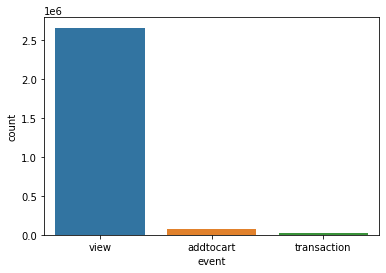

In [ ]:
#Proportion par event

sns.countplot(x='event', data=df);
df.event.value_counts()

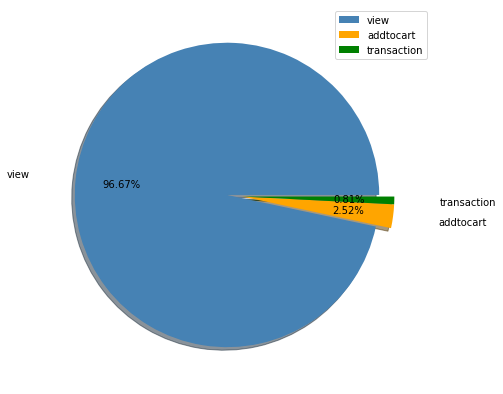

In [ ]:
#Proportion d'event en % graph circuliaire

plt.figure(figsize=(7,7))

plt.pie(df.event.value_counts(),
        labels=['view', 'addtocart','transaction'],
        colors=['steelblue','orange','green'],
        explode = [0.1, 0, 0],
        autopct=lambda x : str(round(x, 2)) + '%',
        pctdistance=0.7, labeldistance=1.3,
        shadow=True)
plt.legend();

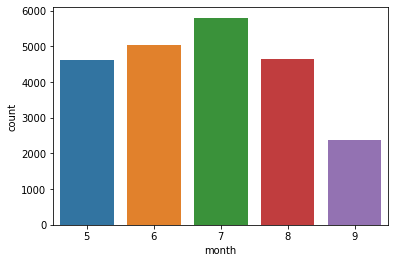

In [ ]:
# Le nombre de transactions par mois

transac=df.loc[df['event']=='transaction']

sns.countplot(x='month', data=transac);

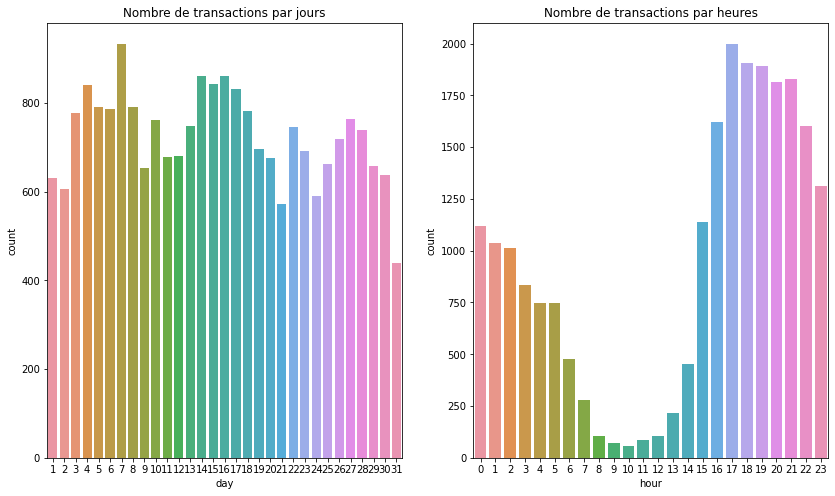

In [ ]:
fig=plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(121) 
ax1=sns.countplot(x='day', data=transac) 
plt.title('Nombre de transactions par jours');

ax2 = fig.add_subplot(122) 
ax2=sns.countplot(x='hour', data=transac) 
plt.title('Nombre de transactions par heures');

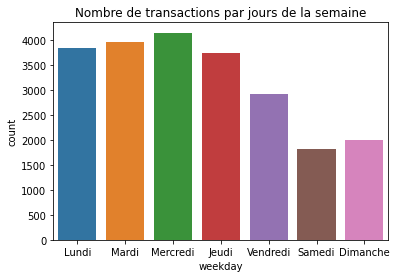

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='weekday', data=transac)
plt.xticks(np.arange(7),['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title('Nombre de transactions par jours de la semaine');

# On remarque que les transactions sont plus en fin de semaine et début de semaine (Dimanche)

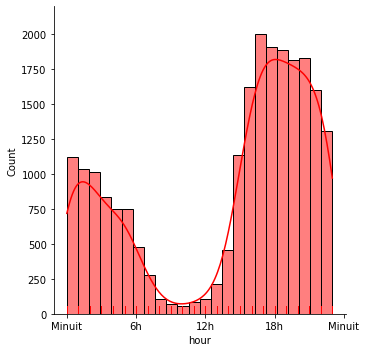

In [ ]:
# On va faire un histogramme et regrouper les heures 

sns.displot(transac.hour, bins=24, kde=True, rug=True, color='red')
plt.xticks([0, 6, 12, 18, 24],['Minuit', '6h', '12h', '18h', 'Minuit']);

In [ ]:
#suivi des visiteurs et des items 

# Nombre de views par visitorid, par item 

visit_view = df.loc[df['event'] == 'view'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})

visit_view = visit_view.rename(columns={"event": "nb_view"})

visit_view.sort_values('nb_view', ascending=False)

In [ ]:
# Nombre de paniers par visitorid, par item 

visit_add = df.loc[df['event'] == 'addtocart'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})

visit_add = visit_add.rename(columns={"event": "nb_addtocart"})

visit_add.sort_values('nb_addtocart', ascending=False)

In [ ]:
# Nombre de transacs par visitorid, par item 

visit_transac = df.loc[df['event'] == 'transaction'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})

visit_transac = visit_transac.rename(columns={"event": "nb_transac"})

visit_transac.sort_values('nb_transac', ascending=False)

In [ ]:
# Fusion des bases

visit_item=pd.merge(visit_view, visit_add, how='outer')

visit_item=pd.merge(visit_item, visit_transac, how='outer')

In [ ]:
visit_item.sort_values(['nb_transac','nb_addtocart', 'nb_view','visitorid', 'itemid'], ascending=[False, False, False, False, False])

verif=df.loc[(df['visitorid']==152963) & (df['itemid']==119736)].sort_values('date')
verif

NameError: ignored

In [ ]:
# Nombre de views par visitorid, par item 

visit_view = df.loc[df['event'] == 'view'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})

visit_view = visit_view.rename(columns={"event": "nb_view"})

visit_view.sort_values('nb_view', ascending=False)

# Nombre de paniers par visitorid, par item 

visit_add = df.loc[df['event'] == 'addtocart'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})

visit_add = visit_add.rename(columns={"event": "nb_addtocart"})

visit_add.sort_values('nb_addtocart', ascending=False)

# Nombre de transacs par visitorid, par item 

visit_transac = df.loc[df['event'] == 'transaction'].groupby(by=['visitorid','itemid'], as_index=False).agg({'event':'count'})

visit_transac = visit_transac.rename(columns={"event": "nb_transac"})

visit_transac.sort_values('nb_transac', ascending=False)


visit_item=pd.merge(visit_view, visit_add, how='outer')

visit_item=pd.merge(visit_item, visit_transac, how='outer')

visit_item.sort_values(['nb_transac','nb_addtocart', 'nb_view','visitorid', 'itemid'], ascending=[False, False, False, False, False])

visit_item.sort_values(by='nb_transac', ascending=False)

# Visiteur qui a acheté sans panier == peut être un acheteur compulsif ? 

In [ ]:
# On va faire un groupement des visitors qui achètent le plus 

visitor_transaction=visit_item.groupby(by='visitorid').agg({'nb_transac':'count', 'visitorid':'count'}).rename(columns={'visitorid':'nb_de_visit'})

plt.figure(figsize=(16,8))
plt.scatter(x='nb_de_visit', y='nb_transac', data=visitor_transaction)
plt.xlabel('Pour chaque visiteur unique, le nb de visites effectués')
plt.ylabel('Le nombre de transactions')
plt.title('Nombre visites par transactions');
plt.plot(view_by_visitor, pred_transac, color="black");

vérif=visitor_transaction.loc[(visitor_transaction['nb_transac']==visitor_transaction['nb_transac'].max())]
print(vérif)

In [ ]:
# Test de Pearson ? 

from scipy.stats import pearsonr

pd.DataFrame(pearsonr(visitor_transaction['nb_de_visit'],visitor_transaction['nb_transac']), index = ['pearson_coeff','p-value'], columns = ['resultat_test'])


#la p-value < 5%, le coefficient est proche de 1, il y a une corrélation entre les deux variables.
#Lorsque le nombre de view augmentent les transactions augmentent aussi.

#on va se tourner vers une modélisation de regression linéaire (prevoir le nb de transactions en fonction du nb de view)

In [ ]:
#tester la regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_validate

nb_transactions=visitor_transaction['nb_transac']
view_by_visitor=visitor_transaction[['nb_de_visit']]

slr=LinearRegression()

slr.fit(view_by_visitor, nb_transactions)

cross_validate(slr, view_by_visitor, nb_transactions, return_train_score=True, cv=4)['test_score'].mean()

pred_transac = slr.predict(view_by_visitor)
residus = pred_transac - nb_transactions


In [ ]:
#melissa
#visualisation d'un funnel

In [ ]:
def plot_stacked_funnel(event, col=None, from_date=None, to_date=None, step_interval=0):
    """
    Function used for producing a (stacked) funnel plot.
    """
    # create list to append each trace to
    # this will be passed to "go.Figure" at the end
    df = []

    # if col is provided, create a funnel_df for each entry in the "col"
    if col:
        # generate dict of funnel dataframes
        dict_ = group_funnel_dfs(events, col)
        title = 'Funnel plot per {}'.format(col)
    else:
        funnel_df = create_funnel_df(events, from_date=from_date, to_date=to_date, step_interval=step_interval)
        dict_ = {'Total': funnel_df}
        title = 'Funnel plot'

    for t in dict_.keys():
        trace = go.Funnel(
            name=t,
            y=dict_[t].step.values,
            x=dict_[t].val.values,
            textinfo="value+percent previous"
        )
        data.append(trace)

    layout = go.Layout(margin={"l": 180, "r": 0, "t": 30, "b": 0, "pad": 0},
                       funnelmode="stack",
                       showlegend=True,
                       hovermode='closest',
                       title='Funnel plot per {}'.format(col),
                       legend=dict(orientation="v",
                                   bgcolor='#E2E2E2',
                                   xanchor='left',
                                   font=dict(
                                       size=12)
                                   )
                       )

    return go.Figure(data, layout)